# BF550 Project 2
## Shivani Pimparkar

Reserach Aritcle :
https://pubmed.ncbi.nlm.nih.gov/32502186/
Dataset:
GSE24548: 
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE24548


In [103]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [111]:
import GEOparse
import pandas as pd
import numpy as np

# Step 1: Import Required Libraries
# Import GEOparse for accessing GEO datasets and pandas for data manipulation.
import GEOparse
import pandas as pd

# Function to parse a GEO dataset using its accession ID
def parse_geo_dataset(accession_id):
    # Parse a GEO (Gene Expression Omnibus) dataset based on the provided accession ID.
    
    #Parameters:accession_id (str): The unique identifier of the GEO dataset to download and parse.
     #Returns:data (pd.DataFrame): Gene expression data pivoted to have samples as columns.
        #metadata (pd.DataFrame): Metadata about the samples, including sample IDs and titles.
    print(f"Parsing GEO dataset {accession_id}...")  # Inform the user about the dataset being parsed.
    
    # Download and parse the GEO dataset using the GEOparse library.
    # The dataset will be stored in the current directory (`destdir="."`).
    geo = GEOparse.get_GEO(geo=accession_id, destdir=".")
    
    # Extract expression data from the GEO dataset:
    # The `pivot_samples` method rearranges the dataset so that samples are columns,
    # and gene identifiers are rows with expression values filled in.
    data = geo.pivot_samples('VALUE')  
    
    # Create a metadata DataFrame to store information about each sample:
    # Metadata includes:
    #   - "Sample": The unique sample IDs.
    #   - "Title": Descriptive titles associated with each sample (e.g., control, patient, etc.).
    metadata = pd.DataFrame({
        "Sample": [sample for sample in geo.gsms.keys()],  # Extract sample IDs.
        "Title": [geo.gsms[sample].metadata["title"][0] for sample in geo.gsms.keys()]  # Extract sample titles.
    })
    
    # Return both the expression data and metadata.
    return data, metadata

# Call the `parse_geo_dataset` function with the GEO dataset accession ID "GSE24548".
data, metadata = parse_geo_dataset("GSE24548")

# Assign Labels Based on Metadata
# Use metadata titles to classify samples:
#   - Samples containing "patient" (case-insensitive) in their title are labeled as 1.
#   - All other samples (assumed to be controls) are labeled as 0.
labels = metadata['Title'].apply(lambda x: 1 if 'patient' in x.lower() else 0).tolist()

# Display the first few rows of the metadata DataFrame for verification.
print(metadata.head())


08-Dec-2024 17:28:52 DEBUG utils - Directory . already exists. Skipping.
08-Dec-2024 17:28:52 INFO GEOparse - File already exist: using local version.
08-Dec-2024 17:28:52 INFO GEOparse - Parsing ./GSE24548_family.soft.gz: 
08-Dec-2024 17:28:52 DEBUG GEOparse - DATABASE: GeoMiame
08-Dec-2024 17:28:52 DEBUG GEOparse - SERIES: GSE24548
08-Dec-2024 17:28:52 DEBUG GEOparse - PLATFORM: GPL8227
08-Dec-2024 17:28:52 WARNING GEOTypes - Detected duplicated columns in d GPL8227. Correcting.

08-Dec-2024 17:28:52 DEBUG GEOparse - SAMPLE: GSM605087
08-Dec-2024 17:28:52 DEBUG GEOparse - SAMPLE: GSM605088
08-Dec-2024 17:28:52 DEBUG GEOparse - SAMPLE: GSM605089
08-Dec-2024 17:28:52 DEBUG GEOparse - SAMPLE: GSM605090
08-Dec-2024 17:28:52 DEBUG GEOparse - SAMPLE: GSM605091
08-Dec-2024 17:28:52 DEBUG GEOparse - SAMPLE: GSM605092
08-Dec-2024 17:28:52 DEBUG GEOparse - SAMPLE: GSM605113


Parsing GEO dataset GSE24548...
      Sample                  Title
0  GSM605087     FAMI patient N. 16
1  GSM605088     FAMI patient N. 26
2  GSM605089     FAMI patient N. 27
3  GSM605090     FAMI patient N. 33
4  GSM605091  FAMI Control N. 4 (A)


In [112]:
# Clean the data (remove rows with missing values)
data = data.dropna()

# Assign Labels (1 for Patient, 0 for Control)
# This line maps the 'Title' column in the metadata DataFrame to a binary classification:
# - Assigns `1` to samples with "patient" in their title (indicating acute MI patients).
# - Assigns `0` to all other samples (indicating normal controls).
labels = metadata['Title'].apply(lambda x: 1 if 'patient' in x.lower() else 0).tolist()

# Standardize the data
# Standardization ensures that each feature (miRNA) has a mean of 0 and a standard deviation of 1.
# This step is critical for PCA as it relies on variance, which could be dominated by features
# with larger scales if not standardized.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.T)  # Transpose the data so rows represent samples and columns represent features.

# Step 3: Perform PCA
# PCA (Principal Component Analysis) is a dimensionality reduction technique.
# It transforms the high-dimensional data into a lower-dimensional space while retaining the maximum variance.
pca = PCA(n_components=3)  # Specify that we want to reduce the data to 3 principal components.
pca_data = pca.fit_transform(scaled_data)  # Perform PCA on the standardized data.

# Explained variance ratio
# This attribute tells us the proportion of variance in the original data captured by each principal component.
# It helps us understand how well the first three principal components represent the data.
explained_variance = pca.explained_variance_ratio_


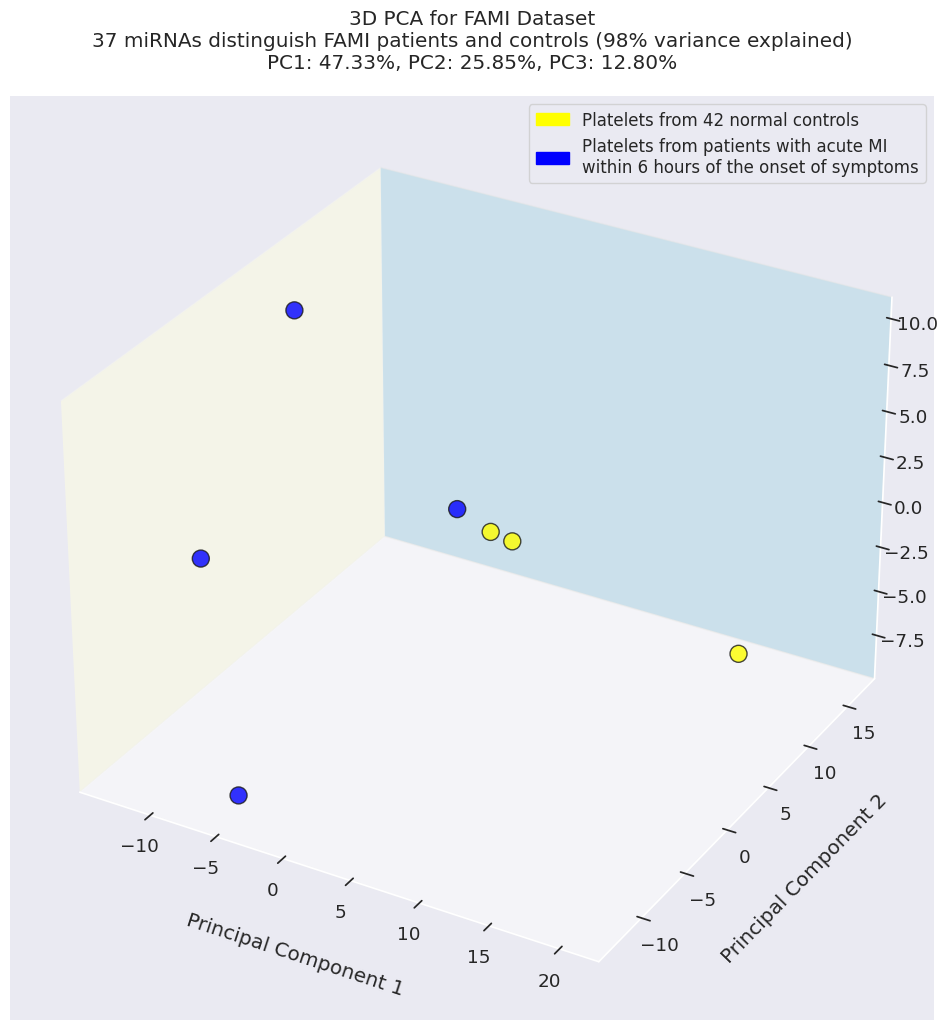

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def enhanced_3d_pca_plot(pca_data, labels, explained_variance, title):
    fig = plt.figure(figsize=(14, 12))  # Increase figure size
    ax = fig.add_subplot(111, projection='3d')

    # Define group colors and labels
    group_colors = {0: 'yellow', 1: 'blue'}
    group_labels = {0: 'Platelets from 42 normal controls', 
                    1: 'Platelets from patients with acute MI\nwithin 6 hours of the onset of symptoms'}

    # Scatter plot with group-specific colors
    colors = [group_colors[label] for label in labels]
    scatter = ax.scatter(
        pca_data[:, 0], pca_data[:, 1], pca_data[:, 2],
        c=colors, s=150, alpha=0.8, edgecolors='k'
    )

    # Add gradient background
    ax.xaxis.pane.fill = True
    ax.yaxis.pane.fill = True
    ax.zaxis.pane.fill = True
    ax.xaxis.pane.set_facecolor('lightyellow')
    ax.yaxis.pane.set_facecolor('lightblue')
    ax.zaxis.pane.set_facecolor('white')

    # Add gridlines and title
    ax.grid(False)  # Disable default grid
    ax.set_title(
        f"{title}\n37 miRNAs distinguish FAMI patients and controls "
        f"(98% variance explained)\nPC1: {explained_variance[0]*100:.2f}%, "
        f"PC2: {explained_variance[1]*100:.2f}%, PC3: {explained_variance[2]*100:.2f}%",
        pad=20
    )

    ax.set_xlabel("Principal Component 1", labelpad=20)
    ax.set_ylabel("Principal Component 2", labelpad=20)
    ax.set_zlabel("Principal Component 3", labelpad=20)

    # Remove internal labels and keep legend only
    # Add a legend for the groups
    patches = [mpatches.Patch(color=color, label=group_labels[label]) 
               for label, color in group_colors.items()]
    ax.legend(handles=patches, loc='upper right', fontsize=12)

    # Save the plot as an image
    plt.savefig("3D_PCA_FAMI_Dataset_Final.png", dpi=300, bbox_inches='tight')

    plt.show()

# Call the updated function
enhanced_3d_pca_plot(pca_data, labels, explained_variance, "3D PCA for FAMI Dataset")


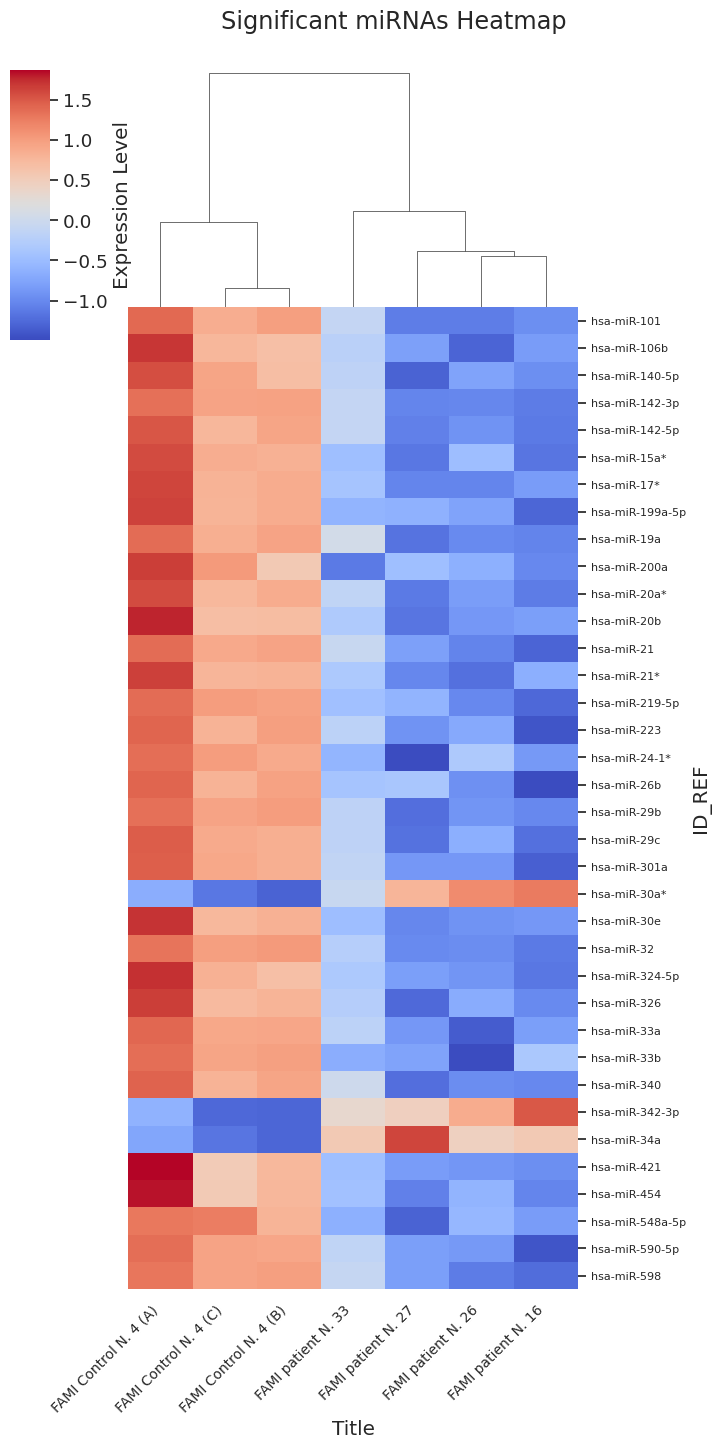

In [114]:
import seaborn as sns
import pandas as pd

# Function for Heatmap
def plot_heatmap(data, sample_labels, top_genes, title):
    # Subset the Data
    if top_genes:
        data = data.loc[top_genes]
    
    # Rearrange Columns (Samples)
    ordered_samples = ["FAMI patient N. 26", "FAMI patient N. 16", "FAMI patient N. 27", 
                       "FAMI patient N. 33", "FAMI Control N. 4 (C)", "FAMI Control N. 4 (B)", 
                       "FAMI Control N. 4 (A)"]
    data = data[ordered_samples]
    
    # Plot the Heatmap
    sns.set(font_scale=1.2)
    clustermap = sns.clustermap(
        data, cmap='coolwarm', row_cluster=False, col_cluster=True,
        xticklabels=ordered_samples, yticklabels=data.index,
        figsize=(8, 15), cbar_kws={"label": "Expression Level"}
    )
    
    plt.setp(clustermap.ax_heatmap.xaxis.get_majorticklabels(), rotation=45, ha="right", fontsize=10)
    plt.setp(clustermap.ax_heatmap.yaxis.get_majorticklabels(), fontsize=8)
    clustermap.fig.suptitle(title, y=1.02)
    clustermap.savefig("Significant_miRNAs_Heatmap.png", dpi=300, bbox_inches='tight')
    plt.show()

# Top Genes List
top_genes = [
    "hsa-miR-101", "hsa-miR-106b", "hsa-miR-140-5p", "hsa-miR-142-3p",
    "hsa-miR-142-5p", "hsa-miR-15a*", "hsa-miR-17*", "hsa-miR-199a-5p",
    "hsa-miR-19a", "hsa-miR-200a", "hsa-miR-20a*", "hsa-miR-20b",
    "hsa-miR-21", "hsa-miR-21*", "hsa-miR-219-5p", "hsa-miR-223",
    "hsa-miR-24-1*", "hsa-miR-26b", "hsa-miR-29b", "hsa-miR-29c",
    "hsa-miR-301a", "hsa-miR-30a*", "hsa-miR-30e", "hsa-miR-32",
    "hsa-miR-324-5p", "hsa-miR-326", "hsa-miR-33a", "hsa-miR-33b",
    "hsa-miR-340", "hsa-miR-342-3p", "hsa-miR-34a", "hsa-miR-421",
    "hsa-miR-454", "hsa-miR-548a-5p", "hsa-miR-590-5p", "hsa-miR-598"
]

# Generate Heatmap
heatmap_data = pd.DataFrame(
    scaled_data.T, index=data.index, columns=metadata["Title"]
)
plot_heatmap(heatmap_data, metadata["Title"], top_genes, "Significant miRNAs Heatmap")
